##Running Model YOLOv8 Pretrained

In [1]:
%pip install opencv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [ ]:
# !pip install ultralytics

In [4]:
from ultralytics import YOLO

In [ ]:
!yolo task=detect mode=train epochs=100 batch=10 data=data_custom.yaml model=yolov8s.pt imgsz=640

Ultralytics YOLOv8.0.159 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data_custom.yaml, epochs=100, patience=50, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 

In [8]:
!yolo task=detect mode=predict model='/content/drive/MyDrive/Final_Project_TA/yolov8s_custom.pt' show=True conf=0.5 source="/content/WhatsApp Image 2023-08-24 at 08.15.312.jpg" save_crop=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.161 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/1 /content/WhatsApp Image 2023-08-24 at 08.15.312.jpg: 640x480 1 plate, 1 sticker, 553.7ms
Speed: 6.0ms preprocess, 553.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2


In [ ]:
!yolo val model=yolov8s_custom.pt data=data_custom.yaml

##Plate Recognition Using OCR

In [ ]:
# %pip install easyocr
# %pip install transformers

In [5]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import imutils
import ultralytics as ul
import easyocr, torch

from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

%matplotlib inline

ModuleNotFoundError: No module named 'transformers'


0: 160x640 1 plate, 238.5ms
Speed: 1.5ms preprocess, 238.5ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 640)


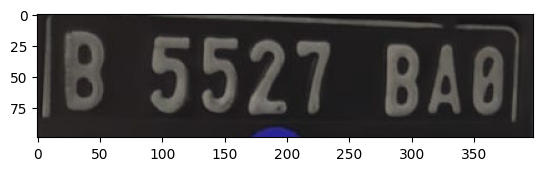

In [39]:
from ultralytics import YOLO

img_path = '/C:/xampp/htdocs/sistemParkir/runs/detect/predict2/crops/plate/sampel24.jpg'
img = cv2.imread(img_path)
#img = cv2.resize(img, (640,640))

model = YOLO("/C:/xampp/htdocs/sistemParkir/yolov8s_custom.pt")  # load a pretrained model
tmp = model.predict(img)

plt.imshow(img)

Text(0.5, 1.0, 'grayscale')

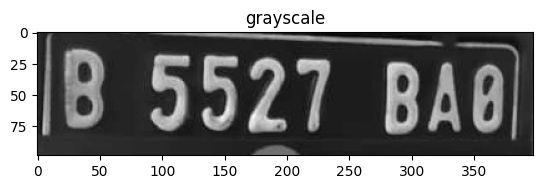

In [40]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("grayscale")

In [41]:
(thresh, img_bw) = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [42]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

Text(0.5, 1.0, 'black_white')

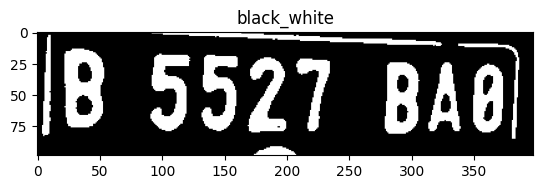

In [43]:
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))
plt.title("black_white")

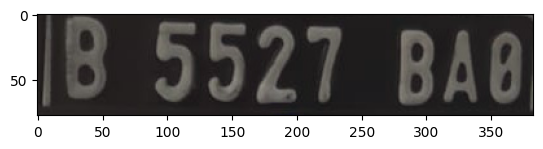

In [44]:
class_ = 0 #  -> Plate, 1 -> Sticker

try:
    tmp_arr = tmp[0].boxes.xyxy.cpu().numpy()[np.where(tmp[0].boxes.cls.cpu().numpy()==class_)[0][0]]
    x_min = int(tmp_arr[0])
    y_min = int(tmp_arr[1])
    x_max = int(tmp_arr[2])
    y_max = int(tmp_arr[3])

    extracted_region = img[y_min:y_max, x_min:x_max]

    plt.imshow(extracted_region)
except:
    print(f'Class : {class_} is not found')

In [45]:
reader = easyocr.Reader(['en'])
result = reader.readtext(extracted_region)

text_r = ''
for r in result:
    text_r+=(r[1]+' ')
print(text_r)

IB 5527 Bao 


## Sticker Recognition Using OCR

In [18]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import imutils
import ultralytics as ul
import easyocr, torch

from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

%matplotlib inline


0: 640x480 1 plate, 1 sticker, 516.9ms
Speed: 5.3ms preprocess, 516.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


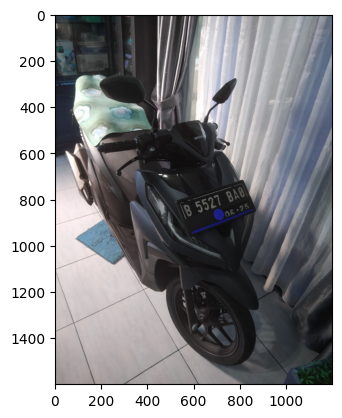

In [23]:
img_path = '/content/WhatsApp Image 2023-08-24 at 08.15.312.jpg'
img = cv2.imread(img_path)
#img = cv2.resize(img, (640,640))

model = YOLO("/content/drive/MyDrive/Final_Project_TA/yolov8s_custom.pt")  # load a pretrained model
tmp = model.predict(img)

plt.imshow(img)

In [21]:
class_ = 1  # -> Plate, 1 -> Sticker

try:
    class_indices = np.where(tmp[0].boxes.cls.cpu().numpy() == class_)[0]

    if 1 in class_indices:
        index_1_position = class_indices[0]
        tmp_arr = tmp[0].boxes.xyxy.cpu().numpy()[index_1_position]
        x_min = int(tmp_arr[0])
        y_min = int(tmp_arr[1])
        x_max = int(tmp_arr[2])
        y_max = int(tmp_arr[3])

        extracted_region = img[y_min:y_max, x_min:x_max]

        #plt.imshow(extracted_region)
        print("VIP")
        print("Data Tersimpan")
    else:
        print("Umum")
        print("Data Tersimpan")

except:
    print(f'Class : {class_} is not found')

VIP
Data Tersimpan


##Saving To .*csv*

In [46]:
import csv

In [50]:
# Contoh hasil pengenalan karakter dari OCR
hasil_ocr = (text_r)
hasil_gambar = (class_)

# Menentukan nama file CSV
nama_file_csv = "hasil_ocr.csv"

# Menyimpan hasil OCR ke dalam file CSV
with open(nama_file_csv, 'w', newline='') as file_csv:
    writer = csv.writer(file_csv)
    writer.writerow(["Hasil OCR"])
    writer.writerow([hasil_ocr])
    writer.writerow([class_])

print("Hasil OCR telah disimpan dalam file CSV.")

Hasil OCR telah disimpan dalam file CSV.


In [ ]:
import csv
import base64

In [ ]:
# Baca gambar dalam bentuk binary
with open("gambar.png", "rb") as img_file:
    img_data = img_file.read()
    img_base64 = base64.b64encode(img_data).decode("utf-8")

In [ ]:
# Informasi lain yang ingin disimpan
nama_file = "gambar.png"
deskripsi = "Ini adalah gambar contoh"

In [ ]:
# Menyimpan data dalam file CSV
nama_file_csv = "data_gambar.csv"
with open(nama_file_csv, "w", newline='') as file_csv:
    writer = csv.writer(file_csv)
    writer.writerow(["Nama File", "Deskripsi", "Data Gambar"])
    writer.writerow([nama_file, deskripsi, img_base64])

print("Data gambar telah disimpan dalam file CSV.")

##Saving To Database

In [ ]:
# !pip install mysql-connector

In [26]:
import mysql.connector

In [31]:
# db = mysql.connector.connect(
#     host="127.0.0.1",
#     user="root",
#     password="",
#     database="sistemparkiruper"
# )

conn = mysql.connector.connect(host='127.0.0.1', db='sistemparkirupe', user='root', passwd='')

InterfaceError: ignored

In [ ]:
def save_detection_results(image_path, objects):
    cursor = db.cursor()

    # Insert informasi objek dan lokasi gambar ke tabel
    for obj in objects:
        label = obj['label']
        confidence = obj['confidence']
        crop_path = obj['crop_path']

        # Sesuaikan dengan struktur tabel yang Anda buat
        insert_query = "INSERT INTO detection_results (label, confidence, crop_path) VALUES (%s, %s, %s)"
        data = (label, confidence, crop_path)
        cursor.execute(insert_query, data)

 # Commit perubahan
    db.commit()
    cursor.close()

In [ ]:
detected_objects = [
    {"label": "person", "confidence": 0.85, "crop_path": "path_to_crop_image1.jpg"},
    {"label": "car", "confidence": 0.92, "crop_path": "path_to_crop_image2.jpg"},
    # ... (objek lainnya)
]

In [ ]:
save_detection_results("/content/WhatsApp Image 2023-08-24 at 08.15.312.jpg", detected_objects)

In [ ]:
# Tutup koneksi database
db.close()